In [1056]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pandas as pd

+----------------------------------------+
|               Input Data               |
+---+-------+-------+-----------+--------+
| i |   x   |   y   |     x²    |   xy   |
+---+-------+-------+-----------+--------+
| 1 |  22.0 | 0.006 |   484.0   | 0.132  |
| 2 |  41.6 | 0.014 |  1730.56  | 0.582  |
| 3 |  57.9 |  0.02 |  3352.41  | 1.158  |
| 4 |  63.9 | 0.023 |  4083.21  |  1.47  |
| 5 |  92.0 | 0.033 |   8464.0  | 3.036  |
| 6 | 117.5 | 0.041 |  13806.25 | 4.818  |
| 7 | 136.0 | 0.048 |  18496.0  | 6.528  |
| 8 | 151.3 | 0.055 |  22891.69 | 8.322  |
| 9 | 170.7 | 0.062 |  29138.49 | 10.583 |
| Σ | 852.9 | 0.302 | 102446.61 | 36.628 |
+---+-------+-------+-----------+--------+ 

+----------------------------------------------+
|       Fit Results & Statistical Errors       |
+------------------+-------------+-------------+
|    Parameter     |    Value    | Uncertainty |
+------------------+-------------+-------------+
|    Slope (a₁)    |    0.0004   |   ±0.0000   |
|  Intercept (a₀

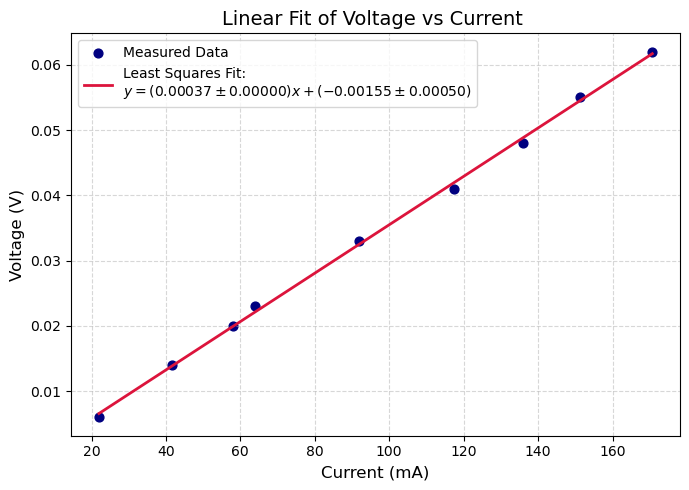

In [1057]:
# To find the Resistance in the absence of magnetic field
#x = Current
#y = Voltage

x = np.array([22.0,41.6,57.9,63.9,92.0,117.5,136.0,151.3,170.7], dtype=float)
y = np.array([0.006,0.014,0.020,0.023,0.033,0.041,0.048,0.055,0.062], dtype=float)
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.5f} \pm {sigma_a1:.5f})x + ({a0:.5f} \pm {sigma_a0:.5f})$')
plt.xlabel("Current (mA)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Linear Fit of Voltage vs Current ", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Fitted parabola coefficients: a=7.629847291934263e-09, b=6.422646193100725e-06, c=-0.013145603301873688


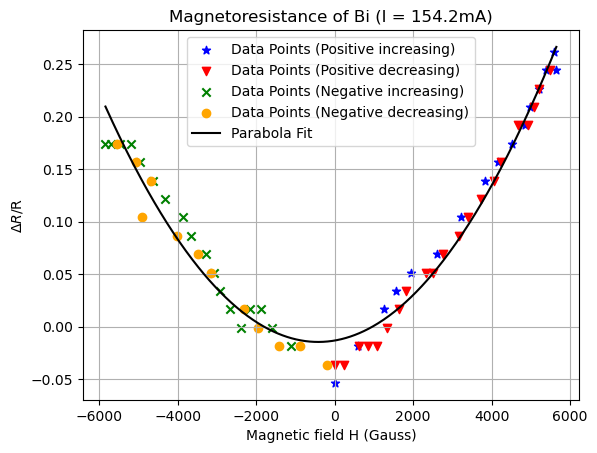

In [1058]:
x = np.array([120,710,1380,1680,2050,2710,3330,3950,4280,4620,4950,5080,5310,5500,5690,5760,5600,5320,5200,5040,4790,4340,4170,3850,3500,3290,2880,2620,2430,1920,1740,1440,1200,950,740,360,120,-1000,-1480,-1760,-2050,-2270,-2550,-2810,-2970,-3180,-3560,-3760,-4200,-4510,-4860,-5080,-5370,-5590,-5730,-5430,-4960,-4570,-4790,-3900,-3370,-3030,-2210,-1840,-1320,-780,-80])
y = np.array([0.054,0.056,0.058,0.059,0.060,0.061,0.063,0.065,0.066,0.067,0.068,0.069,0.070,0.071,0.072,0.071,0.071,0.070,0.069,0.068,0.068, 0.066,0.065,0.064,0.063,0.062,0.061,0.060,0.060,0.059,0.058,0.057,0.056,0.056,0.056,0.055,0.055,0.056,0.057,0.058,0.058,0.057,0.058,0.059,0.060,0.061,0.062,0.063,0.064,0.065,0.066,0.067,0.067,0.067,0.067,0.067,0.066,0.065,0.063,0.062,0.061,0.060,0.058,0.057,0.056,0.056,0.055])
x = x - 112
I = 154.2
R = 0.37e-3

Rm = y/I

delR = Rm - R
delR = delR / R

#Performing the polyfit of this graph
coeff = np.polyfit(x,delR,2)
a = coeff[0]
b = coeff[1]
c = coeff[2]

print(f"Fitted parabola coefficients: a={a}, b={b}, c={c}")
#Generating fitted values
x_fit = np.linspace(min(x), max(x), 500)
y_fit = a*x_fit**2 + b*x_fit + c

#Plotting the data and the fit
plt.scatter(x[:16],delR[:16],color='blue', marker='*',label='Data Points (Positive increasing)')

plt.scatter(x[16:37],delR[16:37],color='red', marker='v',label='Data Points (Positive decreasing)')

plt.scatter(x[37:55],delR[37:55],color='green', marker = 'x',label='Data Points (Negative increasing)')

plt.scatter(x[55:],delR[55:],color='orange',marker = 'o',label='Data Points (Negative decreasing)')

plt.plot(x_fit,y_fit, color='black',label='Parabola Fit',linewidth=1.5)
plt.xlabel("Magnetic field H (Gauss)")
plt.ylabel("$\Delta R$/R")
plt.title("Magnetoresistance of Bi (I = 154.2mA)")
plt.grid()
plt.legend()
plt.show()




In [1059]:
df = pd.DataFrame({'x': x, 'y': y})

def func1(x_val, y_val):
    """for Rm"""
    return y_val/I

def func2(x_val, y_val):
    """for delR/R"""
    return ((y_val/I) - R)/R

def func3(x_val, y_val):
    """for logH"""
    return x_val - y_val

def func4(x_val, y_val):
    """for log(delR/R)"""
    return np.log(func2(x_val, y_val))

# Apply the functions to create new columns
df['column1'] = func1(df['x'], df['y'])
df['column2'] = func2(df['x'], df['y'])
df['column3'] = func3(df['x'], df['y'])
df['column4'] = func4(df['x'], df['y'])

# Display the DataFrame
df.to_csv('Magnetoresistance_I_154.2mA.csv', index=False, encoding='utf-8')


c:\Users\Aryan Shrivastava\.conda\envs\mlenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Forward Fit Coefficients: a=2.2501269213864055e-09, b=3.976776690453518e-05, c=-0.04363537259770598


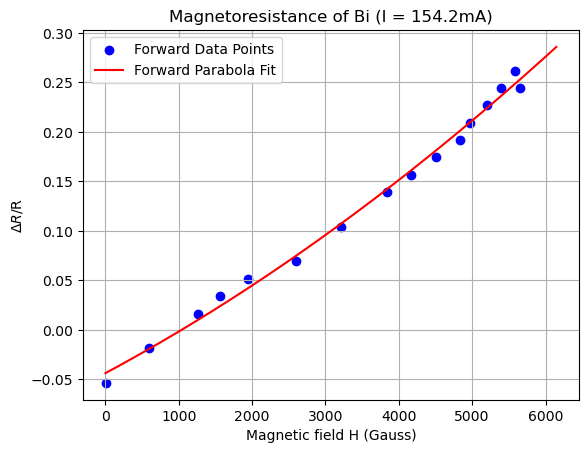

In [1060]:
#Magnetoresistance for I = 154.2 mA
#Performing a quadratic fit 

forward_H = x[:16]
forward_delR = delR[:16]
coeff_forward = np.polyfit(forward_H, forward_delR, 2)
a_forward = coeff_forward[0]
b_forward = coeff_forward[1]
c_forward = coeff_forward[2]
print(f"Forward Fit Coefficients: a={a_forward}, b={b_forward}, c={c_forward}")

plt.scatter(forward_H, forward_delR, color='blue', label='Forward Data Points')
x_fit_forward = np.linspace(0, max(forward_H)+500, 1000)
y_fit_forward = a_forward*x_fit_forward**2 + b_forward*x_fit_forward + c_forward
plt.plot(x_fit_forward, y_fit_forward, color='red', label='Forward Parabola Fit', linewidth=1.5)
plt.xlabel("Magnetic field H (Gauss)")
plt.ylabel("$\Delta R$/R")
plt.title("Magnetoresistance of Bi (I = 154.2mA)")
plt.grid()
plt.legend()
plt.show()


Log-Log Fit Coefficients: slope=1.686416979189042, intercept=-15.911561198814995


C:\Users\Aryan Shrivastava\AppData\Local\Temp\ipykernel_8812\3160829944.py:1: RuntimeWarning: invalid value encountered in log
  logR = np.log(delR[:16] + 1e-10)  # Adding a small constant to avoid log(0)


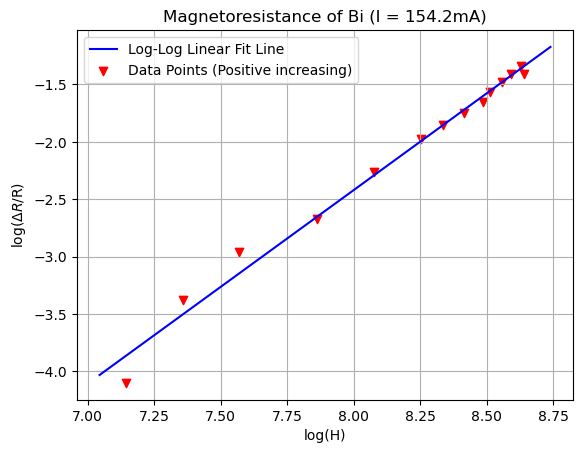

In [1061]:
logR = np.log(delR[:16] + 1e-10)  # Adding a small constant to avoid log(0)
logH = np.log(x[:16] + 1e-5)

logR = logR[2:]
logH = logH[2:]

coeff = np.polyfit(logH, logR, 1)
slope = coeff[0]
intercept = coeff[1]
print(f"Log-Log Fit Coefficients: slope={slope}, intercept={intercept}")
x_fit = np.linspace(min(logH)-0.1, max(logH)+0.1, 500)
y_fit = slope*x_fit + intercept

plt.plot(x_fit, y_fit, color='blue', label='Log-Log Linear Fit Line', linewidth=1.5)
plt.scatter(logH, logR,color='red',marker='v',label='Data Points (Positive increasing)')
plt.xlabel("log(H)")
plt.ylabel("log($\Delta R$/R)")
plt.title("Magnetoresistance of Bi (I = 154.2mA)")
plt.grid()
plt.legend()
plt.show()

Fitted parabola coefficients: a=7.492854774720207e-09, b=6.0250662366814796e-06, c=-0.009826311108528909
[ 618 1078 1508 1988 2258 2628 3048 3398 3858 4168 4398 4838 5238 5648] [-0.00657414 -0.00657414  0.02264427  0.05186267  0.05186267  0.08108108
  0.11029949  0.1395179   0.1395179   0.1395179   0.1687363   0.19795471
  0.22717312  0.25639153]
[5118 4728 4468 3898 3528 3038 2298 1708 1388 1028  698  288] [ 0.19795471  0.1687363   0.1395179   0.11029949  0.11029949  0.08108108
  0.05186267  0.02264427  0.02264427 -0.00657414 -0.00657414 -0.03579255]
[ -542 -1002 -1242 -1702 -2022 -2652 -3102 -3562 -3932 -4222 -4652 -5062
 -5322 -5512 -5842] [-0.03579255 -0.00657414 -0.00657414 -0.00657414  0.02264427  0.05186267
  0.05186267  0.08108108  0.08108108  0.11029949  0.1395179   0.1395179
  0.1687363   0.19795471  0.19795471]
[-5492 -5102 -4452 -4032 -3302 -3012 -2592 -2432 -2162 -1842 -1352  -732
  -242] [ 0.19795471  0.1395179   0.11029949  0.08108108  0.05186267  0.05186267
  0.02264427

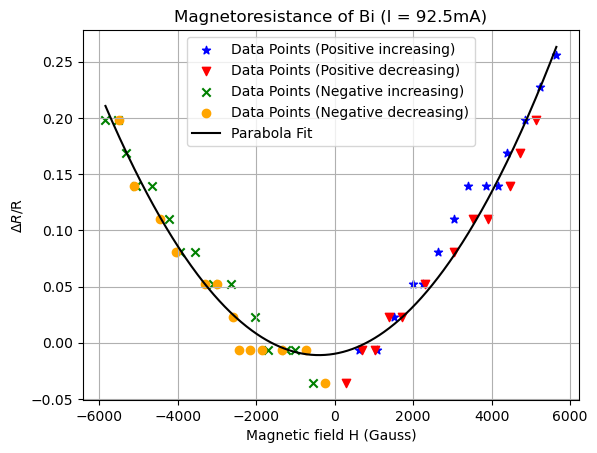

In [1062]:
x = np.array([730,1190,1620,2100,2370,2740,3160,3510,3970,4280,4510,4950,5350,5760,5230,4840,4580,4010,3640,3150,2410,1820,1500,1140,810,400,-430,-890,-1130,-1590,-1910,-2540,-2990,-3450,-3820,-4110,-4540,-4950,-5210,-5400,-5730,-5380,-4990,-4340,-3920,-3190,-2900,-2480,-2320,-2050,-1730,-1240,-620,-130])
y = np.array([0.034,0.034,0.035,0.036,0.036,0.037,0.038,0.039,0.039,0.039,0.040,0.041,0.042,0.043,0.041,0.040,0.039,0.038,0.038,0.037,0.036, 0.035,0.035,0.034,0.034,0.033,0.033,0.034,0.034,0.034,0.035,0.036,0.036,0.037,0.037,0.038,0.039,0.039,0.040,0.041,0.041,0.041,0.039,0.038,0.037,0.036,0.036,0.035,0.034,0.034,0.034,0.034,0.034,0.033])
x = x -112
I = 92.5
R = 0.37e-3

Rm = y/I

delR = Rm - R
delR = delR / R

#Performing the polyfit of this graph
coeff = np.polyfit(x,delR,2)
a = coeff[0]
b = coeff[1]
c = coeff[2]
print(f"Fitted parabola coefficients: a={a}, b={b}, c={c}")

#Generating fitted values
x_fit = np.linspace(min(x), max(x), 500)
y_fit = a*x_fit**2 + b*x_fit + c

#Plotting the data and the fit
plt.scatter(x[:14],delR[:14],color='blue',marker='*',label='Data Points (Positive increasing)')
print(x[:14],delR[:14])
plt.scatter(x[14:26],delR[14:26],color='red',marker='v',label='Data Points (Positive decreasing)')
print(x[14:26],delR[14:26])
plt.scatter(x[26:41],delR[26:41],color='green',marker='x',label='Data Points (Negative increasing)')
print(x[26:41],delR[26:41])
plt.scatter(x[41:54],delR[41:54],color='orange',marker='o',label='Data Points (Negative decreasing)')
print(x[41:54],delR[41:54])
plt.plot(x_fit,y_fit, color='black',label='Parabola Fit',linewidth=1.5)
plt.xlabel("Magnetic field H (Gauss)")
plt.ylabel("$\Delta R$/R")
plt.title("Magnetoresistance of Bi (I = 92.5mA)")
plt.grid()
plt.legend()
plt.show()


In [1063]:
df = pd.DataFrame({'x': x, 'y': y})

def func1(x_val, y_val):
    """for Rm"""
    return y_val/I

def func2(x_val, y_val):
    """for delR/R"""
    return ((y_val/I) - R)/R

def func3(x_val, y_val):
    """for logH"""
    return x_val - y_val

def func4(x_val, y_val):
    """for log(delR/R)"""
    return np.log(func2(x_val, y_val))

# Apply the functions to create new columns
df['column1'] = func1(df['x'], df['y'])
df['column2'] = func2(df['x'], df['y'])
df['column3'] = func3(df['x'], df['y'])
df['column4'] = func4(df['x'], df['y'])

# Display the DataFrame
df.to_csv('Magnetoresistance_I_92.5mA.csv', index=False, encoding='utf-8')

c:\Users\Aryan Shrivastava\.conda\envs\mlenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Forward Fit Coefficients: a=1.8526550926865746e-09, b=3.920207872578651e-05, c=-0.03819922523642719


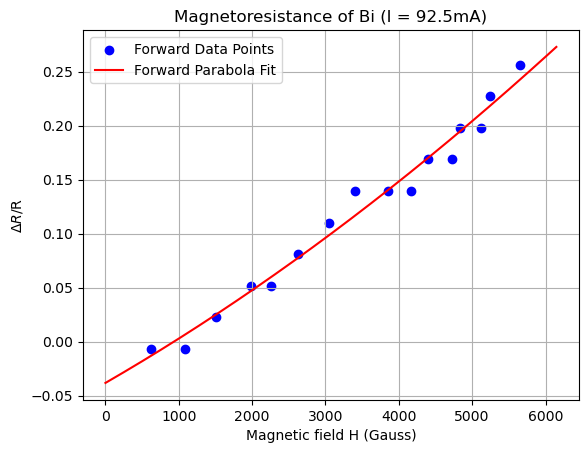

In [1064]:
#Magnetoresistance for I = 154.2 mA
#Performing a quadratic fit 

forward_H = x[:16]
forward_delR = delR[:16]
coeff_forward = np.polyfit(forward_H, forward_delR, 2)
a_forward = coeff_forward[0]
b_forward = coeff_forward[1]
c_forward = coeff_forward[2]
print(f"Forward Fit Coefficients: a={a_forward}, b={b_forward}, c={c_forward}")

plt.scatter(forward_H, forward_delR, color='blue', label='Forward Data Points')
x_fit_forward = np.linspace(0, max(forward_H)+500, 1000)
y_fit_forward = a_forward*x_fit_forward**2 + b_forward*x_fit_forward + c_forward
plt.plot(x_fit_forward, y_fit_forward, color='red', label='Forward Parabola Fit', linewidth=1.5)
plt.xlabel("Magnetic field H (Gauss)")
plt.ylabel("$\Delta R$/R")
plt.title("Magnetoresistance of Bi (I = 92.5mA)")
plt.grid()
plt.legend()
plt.show()

Log-Log Fit Coefficients: slope=1.659827051866236, intercept=-15.696220343023136


C:\Users\Aryan Shrivastava\AppData\Local\Temp\ipykernel_8812\2851425921.py:1: RuntimeWarning: invalid value encountered in log
  logR = np.log(delR[:16] + 1e-10)  # Adding a small constant to avoid log(0)


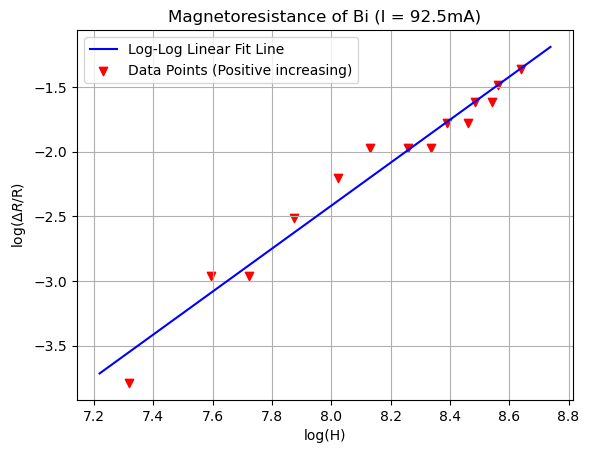

In [1065]:
logR = np.log(delR[:16] + 1e-10)  # Adding a small constant to avoid log(0)
logH = np.log(x[:16] + 1e-5)

logR = logR[2:]
logH = logH[2:]

coeff = np.polyfit(logH, logR, 1)
slope = coeff[0]
intercept = coeff[1]
print(f"Log-Log Fit Coefficients: slope={slope}, intercept={intercept}")
x_fit = np.linspace(min(logH)-0.1, max(logH)+0.1, 500)
y_fit = slope*x_fit + intercept

plt.plot(x_fit, y_fit, color='blue', label='Log-Log Linear Fit Line', linewidth=1.5)
plt.scatter(logH, logR,color='red',marker='v',label='Data Points (Positive increasing)')
plt.xlabel("log(H)")
plt.ylabel("log($\Delta R$/R)")
plt.title("Magnetoresistance of Bi (I = 92.5mA)")
plt.grid()
plt.legend()
plt.show()

# Hall Effect

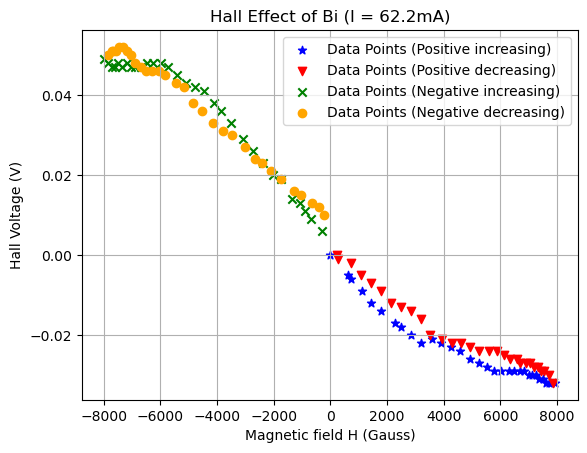

In [1066]:
#Hall effect of Bismuth
#Probe current I = 62.2mA

data = pd.read_csv('Table1.csv') 
x = data['Magnetic field (H) (Gauss)'].to_numpy()
y = data['Hall Voltage (V)'].to_numpy()
pd.set_option('display.max_rows', None)
x = x -180
#Plotting the data and the fit
plt.scatter(x[:32],y[:32],color='blue', marker='*',label='Data Points (Positive increasing)')

plt.scatter(x[32:62],y[32:62],color='red', marker='v',label='Data Points (Positive decreasing)')

plt.scatter(x[62:93],y[62:93],color='green', marker = 'x',label='Data Points (Negative increasing)')

plt.scatter(x[93:],y[93:],color='orange',marker = 'o',label='Data Points (Negative decreasing)')

plt.xlabel("Magnetic field H (Gauss)")
plt.ylabel("Hall Voltage (V)")
plt.title("Hall Effect of Bi (I = 62.2mA)")
plt.grid()
plt.legend()
plt.show()



+--------------------------------------+
|              Input Data              |
+---+------+--------+---------+--------+
| i |  x   |   y    |    x²   |   xy   |
+---+------+--------+---------+--------+
| 1 |  0   |  0.0   |    0    |  0.0   |
| 2 | 610  | -0.005 |  372100 | -3.05  |
| 3 | 740  | -0.006 |  547600 | -4.44  |
| 4 | 1130 | -0.009 | 1276900 | -10.17 |
| 5 | 1440 | -0.012 | 2073600 | -17.28 |
| Σ | 3920 | -0.032 | 4270200 | -34.94 |
+---+------+--------+---------+--------+ 

+-----------------------------------------------+
|        Fit Results & Statistical Errors       |
+------------------+--------------+-------------+
|    Parameter     |    Value     | Uncertainty |
+------------------+--------------+-------------+
|    Slope (a₁)    |   -0.0000    |   ±0.0000   |
|  Intercept (a₀)  |    0.0001    |   ±0.0002   |
| σ_y (Std. Error) |    0.0002    |             |
|    Δ (delta)     | 5984600.0000 |             |
+------------------+--------------+-------------+ 

+---

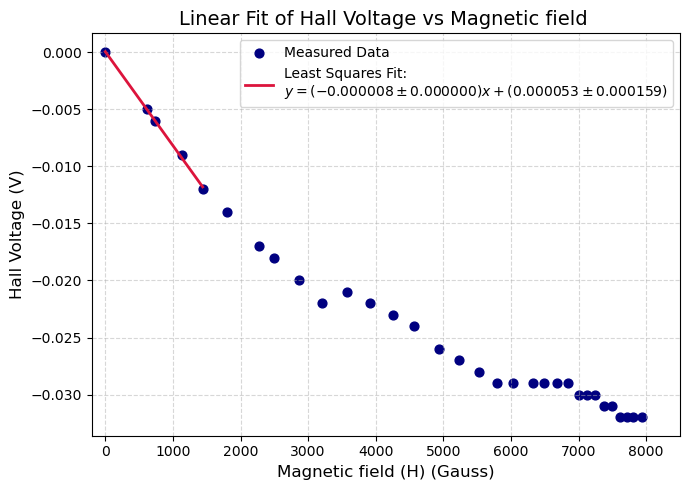

Hall Coefficient: -6.616661220390642e-07 m^3/C


In [1067]:
H = x[:32]
V_Hall = y[:32]
x = H[:5]
y = V_Hall[:5]
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(H, V_Hall, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.6f} \pm {sigma_a1:.6f})x + ({a0:.6f} \pm {sigma_a0:.6f})$')
plt.xlabel("Magnetic field (H) (Gauss)", fontsize=12)
plt.ylabel("Hall Voltage (V)", fontsize=12)
plt.title("Linear Fit of Hall Voltage vs Magnetic field ", fontsize=14)
plt.xlim(-200, 8500)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Hall_coeff = a1*10*0.5 / 62.2
print(f"Hall Coefficient: {Hall_coeff} m^3/C")

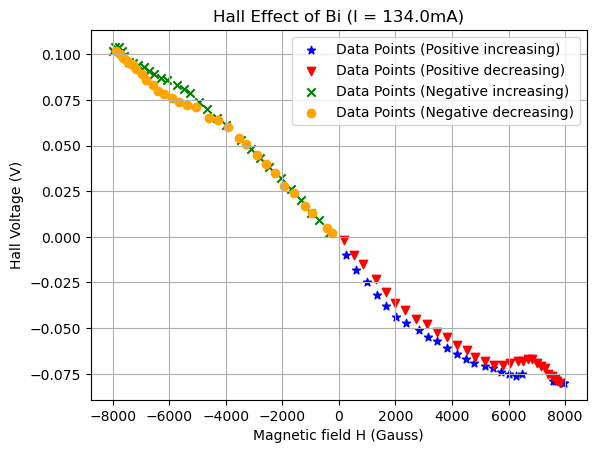

In [1068]:
#Hall effect of Bismuth
#Probe current I = 134.0mA

data = pd.read_csv('Table2.csv') 
x = data['H'].to_numpy()
y = data['V'].to_numpy()
pd.set_option('display.max_rows', None)
x = x - 180
#Plotting the data and the fit
plt.scatter(x[:26],y[:26],color='blue', marker='*',label='Data Points (Positive increasing)')

plt.scatter(x[26:56],y[26:56],color='red', marker='v',label='Data Points (Positive decreasing)')

plt.scatter(x[56:86],y[56:86],color='green', marker = 'x',label='Data Points (Negative increasing)')

plt.scatter(x[86:],y[86:],color='orange',marker = 'o',label='Data Points (Negative decreasing)')

plt.xlabel("Magnetic field H (Gauss)")
plt.ylabel("Hall Voltage (V)")
plt.title("Hall Effect of Bi (I = 134.0mA)")
plt.grid()
plt.legend()
plt.show()


+----------------------------------------+
|               Input Data               |
+---+------+--------+----------+---------+
| i |  x   |   y    |    x²    |    xy   |
+---+------+--------+----------+---------+
| 1 | 260  | -0.01  |  67600   |   -2.6  |
| 2 | 620  | -0.018 |  384400  |  -11.16 |
| 3 | 980  | -0.025 |  960400  |  -24.5  |
| 4 | 1330 | -0.032 | 1768900  |  -42.56 |
| 5 | 1680 | -0.038 | 2822400  |  -63.84 |
| 6 | 2030 | -0.044 | 4120900  |  -89.32 |
| Σ | 6900 | -0.167 | 10124600 | -233.98 |
+---+------+--------+----------+---------+ 

+------------------------------------------------+
|        Fit Results & Statistical Errors        |
+------------------+---------------+-------------+
|    Parameter     |     Value     | Uncertainty |
+------------------+---------------+-------------+
|    Slope (a₁)    |    -0.0000    |   ±0.0000   |
|  Intercept (a₀)  |    -0.0058    |   ±0.0006   |
| σ_y (Std. Error) |     0.0007    |             |
|    Δ (delta)     | 13137600.0

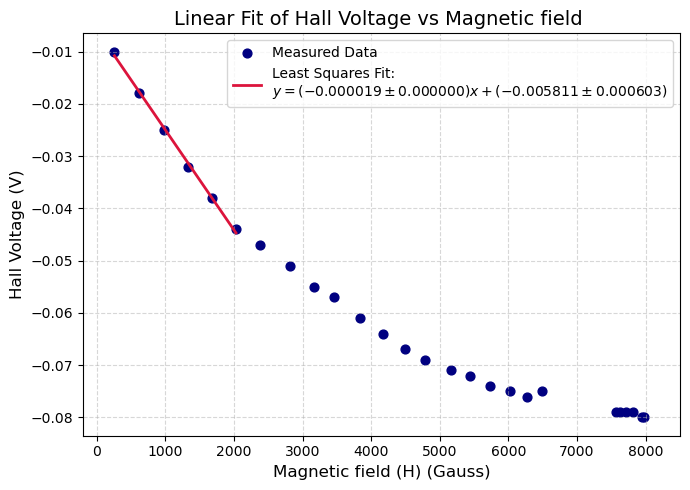

Hall Coefficient: -7.145379241897925e-07 m^3/C


In [1069]:
H = x[:26]
V_Hall = y[:26]
x = H[:6]
y = V_Hall[:6]
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(H, V_Hall, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.6f} \pm {sigma_a1:.6f})x + ({a0:.6f} \pm {sigma_a0:.6f})$')
plt.xlabel("Magnetic field (H) (Gauss)", fontsize=12)
plt.ylabel("Hall Voltage (V)", fontsize=12)
plt.title("Linear Fit of Hall Voltage vs Magnetic field ", fontsize=14)
plt.xlim(-200, 8500)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
Hall_coeff = a1*10*0.5 / 134.0
print(f"Hall Coefficient: {Hall_coeff} m^3/C")